<a href="https://colab.research.google.com/github/stepanve/colaboratory-study/blob/master/study8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [5]:
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1r7y])

SyntaxError: ignored

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [11]:
pca.explained_variance_

array([1.899, 0.111])

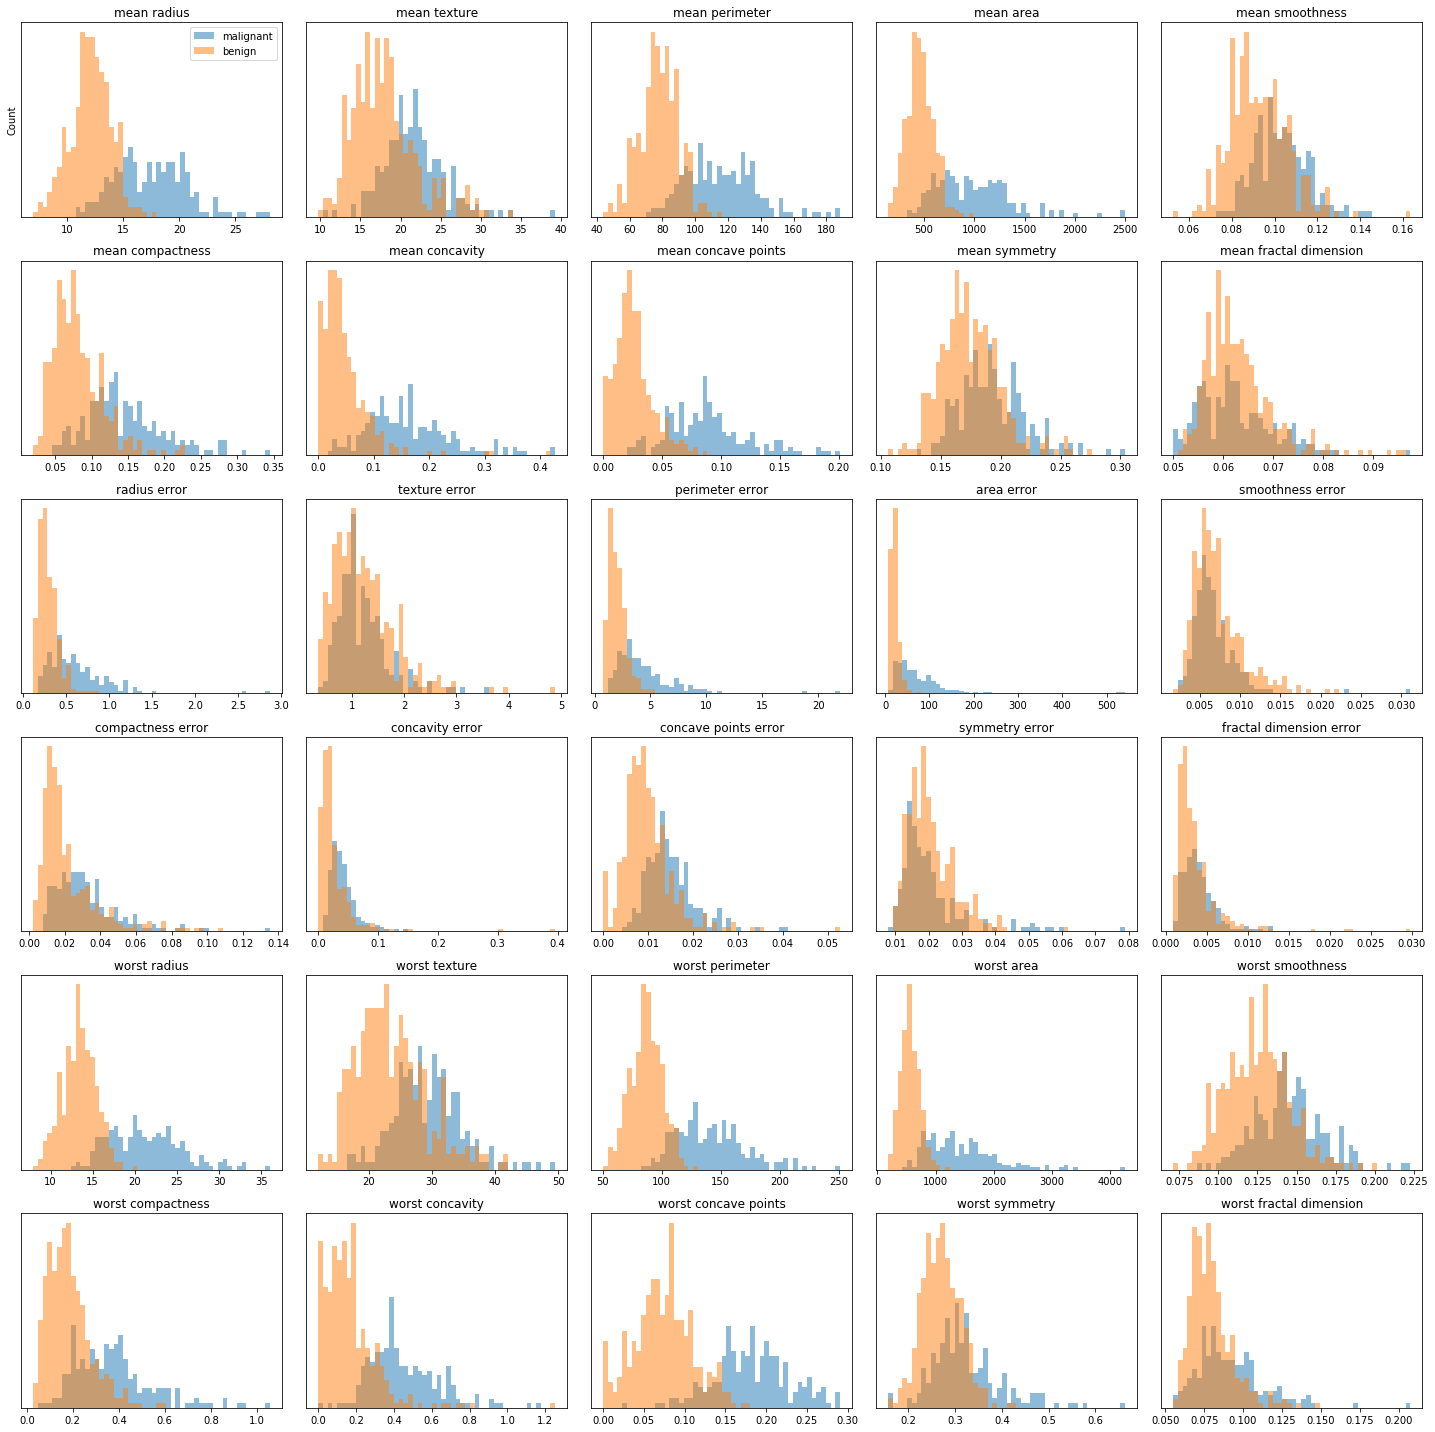

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

fig, axes = plt.subplots(6, 5, figsize=(20, 20))
ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins=50)
  ax[i].hist(malignant[:,i], bins, alpha=.5)
  ax[i].hist(benign[:,i], bins, alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
  
ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [23]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print(X_pca.shape)
print(pca.explained_variance_ratio_)

(569, 2)
[0.443 0.19 ]


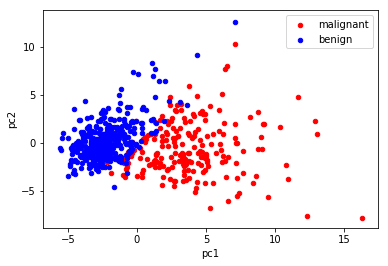

In [27]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

pca_malignant = X_pca[X_pca['target']==0]
pca_begnign = X_pca[X_pca['target']==1]

ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')

pca_begnign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)